In [301]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine, text

In [447]:
factor_dict={
'sector': 'CP10000600',
'industry': 'CP10000800',
'mkt':'CP10000300',
'adjPrice':'S410000700',
'trdYN':'S410002600',
'mgtYN':'S410002700',
'tmv':'S420002100',
'trdVol_20avg':'S41000630F',
'trdVol_60avg':'S41000640F',
'trdVol_120avg':'S41000650F',
'trA_20avg_spot':'S410007000',
'trA_60avg_spot':'S410007100',
'epsConNmb':'F710012110',
'k2YN':'CP10000310',
'clsMnth':'CP10002200',
'p_price_spot':'S41000060F',
'pHigh_spot':'S41000040F',
'pLow_spot':'S41000040F',
'retStdev_20_spot':'S410008600',
'retStdev_120_spot':'S410008800',
'senti_invTrst20':'CI20033022',
'senti_invTrst60':'CI20033023',
'senti_invTrst120':'CI20033024',
'senti_inst20':'CI20003022',
'senti_inst60':'CI20003023',
'senti_inst120':'CI20003024',
'senti_forg20':'CI20113022',
'senti_forg60':'CI20113023',
'senti_forg120':'CI20113024',
'epsF_spot':'F730041100',
'epsT_spot':'F730041200',
'bpsF_spot':'F730041250',
'bpsT_spot':'F730041260',
'salesF_spot':'F730041500',
'salesT_spot':'F730041530',
'earningsF_spot':'F730041515',
'earningsT_spot':'F730041545',
'cashFlowF_spot':'F730041585',
'dbtRtQ_':'6000102001',
'totalEQ_0':'6000903001',
'salseQ_0':'6000904001',
'earningsQ_0':'6000906001',
'cashFlowQ_0':'6000909011',
'div_0':'6000706032',
}

# 'anlstTp_spot':'',

# 'adjPrice_1':,
# 'dailyRet':,
# 'dAdjprice_spot':'',
# 'dAdjprice_30':'',
# 'dAdjprice_365':'',
# 'epsF_30':'',
# 'epsT_30':'',
# 'bpsF_30':'',
# 'bpsT_30':'',
# 'salesF_30':'',
# 'salesT_30':'',
# 'earningsF_30':'',
# 'earningsT_30':'',
# 'anlstTp_30':'',
# 'dbtRtQ_-4':'',
# 'salseQ_-1':'',
# 'salseQ_-2':'',
# 'salseQ_-3':'',
# 'salseQ_-4':'',
# 'earningsQ_-1':'',
# 'earningsQ_-2':'',
# 'earningsQ_-3':'',
# 'earningsQ_-4':'',
# 'cashFlowQ_-1':'',
# 'cashFlowQ_-2':'',
# 'cashFlowQ_-3':'',
# 'cashFlowQ_-4':'',
# 'div_-1':'',
# 'div_-2':''

In [128]:
selected_ls=['date', 
             'code', 
             'name', 
             'sector', 
             'industry', 
             'mkt', 
             'tmv', 
             'log(tmv)',
             'weight', 
             'size', 
             'value', 
             'earningYield', 
             'quality', 
             'stability', 
             'dividend', 
             'growth', 
             'momentum', 
             'adjMomentum', 
             'priceMomentum', 
             'priceReversal', 
             'priceStdev',
             'trading', 
             'investSentiment', 
             'cashFlowOtmv', 
             'cashFlowYOY', 
             'earningsOtmv', 
             'earningsYOY',
             'salesOtmv',
             'salesYOY', 
             'senti_forg20', 
             'senti_forg60', 
             'senti_forg120', 
             'trA_20avg_spot',
             'trA_60avg_spot', 
             'k2YN']

### load data from DB

In [2]:
host = '192.168.1.27'
port = '3306'
db_name = 'quantdb_maria'
username = 'quantdb'
password = 'QuantDb2023!'

engine = create_engine("mysql+pymysql://" + username + ":" + password + "@" + host + ":" + port + "/" + db_name)
conn=engine.connect()

In [12]:
data_from_COM=text("select * from COM_Table")

In [16]:
trading_dates=text("select unique(Dates) from SSC_Table")
dates=pd.read_sql(trading_dates, conn)

In [17]:
dates

,Dates
0,2006-10-11
1,2013-04-04
2,2013-04-05
3,2013-04-08
4,2013-04-09
...,...
2495,2023-05-24
2496,2023-05-25
2497,2023-05-26
2498,2023-05-30


In [13]:
com_data=pd.read_sql(data_from_COM, conn)

In [14]:
com_data

,Dates,Symbol,Name,KC_Industry,FG_Sector,FG_IndustryGroup,FG_Industry,FG_IndustryGroup27,FG_Sector_idx,FG_IndustryGroup_idx,FG_Industry_idx,AuditOpinion,InvestCaution,KSECapSize,KLCAIndustry,Market,KOSPI200YN,FiscalMonth
0,2006-10-11,A000010,조흥은행,코스피 은행,금융,은행,상업은행,은행,None,자동차 및 부품,자동차부품,None,None,제외,은행업,None,N,None
1,2006-10-11,A000020,동화약품,코스피 의약품,의료,제약 및 바이오,제약,의료,의료,제약 및 바이오,제약,적정의견,정상,코스피 중형주,제조업,KSE,N,3
2,2006-10-11,A000030,우리은행,코스피 은행,금융,은행,상업은행,None,None,None,None,적정의견,None,제외,은행업,None,N,None
3,2006-10-11,A000040,KR모터스,코스피 운수장비,경기소비재,자동차 및 부품,자동차,None,경기소비재,자동차 및 부품,자동차,적정의견,정상,코스피 중형주,제조업,KSE,N,12
4,2006-10-11,A000050,경방,"코스피 섬유,의복",경기소비재,내구 소비재 및 의류,섬유 및 의복,내구소비재및의류,경기소비재,내구 소비재 및 의류,섬유 및 의복,적정의견,정상,코스피 중형주,제조업,KSE,N,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984995,2023-05-31,A900140,엘브이엠씨홀딩스,None,경기소비재,자동차 및 부품,자동차,None,None,None,None,None,정상,제외,제조업,KSE,N,12
2984996,2023-05-31,A950010,평산차업 KDR,코스피 제조업,필수소비재,음식료 및 담배,식료품,None,None,None,None,None,None,제외,제조업,None,N,None
2984997,2023-05-31,A950070,중국고섬,None,경기소비재,내구 소비재 및 의류,섬유 및 의복,None,None,None,None,None,None,제외,제조업,None,N,None
2984998,2023-05-31,A950100,SBI모기지,None,금융,은행,상호저축은행,None,None,None,None,None,None,제외,기타금융업,None,N,None


In [760]:
period1='2015-01-01'
period2='2023-06-01'

In [768]:
query_COM=f"select * from COM_Table where (Dates>='{period1}' and Dates<='{period2}')"
data_COM=pd.read_sql(query_COM, conn)

In [764]:
len(data_COM), len(data_COM[data_COM['KOSPI200YN']=='Y'])

(2482256, 414976)

### combine tables

In [108]:
query_CIA=f"select * from CIA_Table where Dates>='{period1}' and Dates<='{period2}'"
data_CIA=pd.read_sql(query_CIA, conn)

In [ ]:
query_SSC=f"select * from SSC_Table where Dates>='{period1}' and Dates<='{period2}'"
data_SSC=pd.read_sql(query_SSC, conn)

query_IFRS=f"select * from IFRS_Table where Dates>='{period1}' and Dates<='{period2}'"
data_IFRS=pd.read_sql(query_IFRS, conn)

query_CON=f"select * from CON_Table where Dates>='{period1}' and Dates<='{period2}'"
data_CON=pd.read_sql(query_CON, conn)               

In [38]:
query_catalog=f"select * from Catalog_Table"
data_catalog=pd.read_sql(query_catalog, conn)

In [39]:
data_catalog

,Table_Name,Frequency,Dates,Item_Code,Item_Name_kor,Item_Name_eng,DB_col_name
0,COM,Annual,2017-03-24 00:00:00,CP30900010,시장 대표 업종(Hist.),Koscom Industry(Hist.),KC_Industry
1,COM,Annual,2017-03-24 00:00:00,CP10007100,FnGuide Industry Group 27,FnGuide Industry Group 27,FG_IndustryGroup27
2,COM,Annual,2017-03-24 00:00:00,CP10000650,FnGuide Sector (지수 편입 기준),FnGuide Sector (Index),FG_Sector_Idx
3,COM,Annual,2017-03-24 00:00:00,CP10000850,FnGuide Industry Group (지수 편입 기준),FnGuide Industry Group (Index),FG_IndustryGroup_Idx
4,COM,Annual,2017-03-24 00:00:00,CP10001050,FnGuide Industry (지수 편입 기준),FnGuide Industry (Index),FG_Industry_Idx
...,...,...,...,...,...,...,...
181,CON,2017(ANNUAL),2017-03-24 00:00:00,F730015266,"ROE (E3, 1M Chg)(%)","ROE (E3, 1M Chg)(%)",ROE_E3_1M_Chg
182,CON,2017(ANNUAL),2017-03-24 00:00:00,F730015336,"ROE (E3, 3M Chg)(%)","ROE (E3, 3M Chg)(%)",ROE_E3_3M_Chg
183,CON,2017(ANNUAL),2017-03-24 00:00:00,F730015406,"ROE (E3, 6M Chg)(%)","ROE (E3, 6M Chg)(%)",ROE_E3_6M_Chg
184,CON,2017(ANNUAL),2017-03-24 00:00:00,F730011820,SPS (E3)(원),SPS (E3)(Won),SPS_E3


In [744]:
query_idx=f"select * from krx_idx"
krx_idx=pd.read_sql(query_idx, conn)

In [746]:
krx_idx.set_index(krx_idx.columns[0], inplace=True)

In [747]:
krx_idx

,코스피,코스피 200,코스피 100,코스피 50,코스닥 150,코스닥
Symbol Name,,,,,,
2000-01-04,1059.04,133.66,NaN,NaN,NaN,2660.00
2000-01-05,986.31,123.86,922.14,918.40,NaN,2629.50
2000-01-06,960.79,120.80,900.82,898.72,NaN,2475.20
2000-01-07,948.65,119.10,887.78,883.90,NaN,2276.60
2000-01-10,987.24,124.11,927.12,924.83,NaN,2310.80
...,...,...,...,...,...,...
2023-05-25,2554.69,335.35,2528.51,2323.50,1278.26,847.72
2023-05-26,2558.81,337.11,2544.73,2340.88,1275.05,843.23
2023-05-30,2585.52,341.50,2579.41,2373.98,1293.51,851.50


### preprocessing DB data

In [109]:
data_COM.shape, data_CIA.shape, data_SSC.shape, data_IFRS.shape, data_CON.shape

((297104, 15), (297104, 19), (297104, 35), (297104, 66), (297104, 66))

In [110]:
data_COM.set_index(['Dates', 'Symbol'], inplace=True)
data_SSC.set_index(['Dates', 'Symbol'], inplace=True)
data_CIA.set_index(['Dates', 'Symbol'], inplace=True)
data_IFRS.set_index(['Dates', 'Symbol'], inplace=True)
data_CON.set_index(['Dates', 'Symbol'], inplace=True)

In [206]:
data_SSC['TradeStop'][data_SSC['TradeStop']=='정상']=0
data_SSC['TradeStop'][data_SSC['TradeStop']=='거래정지']=1

In [213]:
# data_SSC.iloc[:, 2:]=data_SSC.iloc[:, 2:].astype(float)
data_SSC[data_SSC.columns[2:]]=data_SSC[data_SSC.columns[2:]].astype(float)

<ipython-input-213-a7f1d3511d91>:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_SSC.iloc[:, 2:]=data_SSC.iloc[:, 2:].astype(float)


In [193]:
# data_CIA.iloc[:, 2:]=data_CIA.iloc[:, 2:].astype(float)
data_CIA[data_CIA.columns[2:]]=data_CIA[data_CIA.columns[2:]].astype(float)

In [220]:
data_IFRS.loc[data_IFRS['LE_TQ']=='완전잠식']=99999
data_IFRS.loc[data_IFRS['LE_LQ']=='완전잠식']=99999
data_IFRS.loc[data_IFRS['LE_2LQ']=='완전잠식']=99999
data_IFRS.loc[data_IFRS['LE_3LQ']=='완전잠식']=99999

In [221]:
data_IFRS[data_IFRS.columns[2:]]=data_IFRS[data_IFRS.columns[2:]].astype(float)

In [226]:
data_CON=data_CON.mask(data_CON=='N/A', other=None)

In [227]:
data_CON[data_CON.columns[2:]]=data_CON[data_CON.columns[2:]].astype(float)

In [230]:
temp_data=pd.concat([data_COM, data_CIA, data_SSC, data_IFRS, data_CON], axis=1)

In [231]:
temp_data.columns

Index(['Name', 'KC_Industry', 'FG_IndustryGroup27', 'FG_Sector_Idx',
       'FG_IndustryGroup_Idx', 'FG_Industry_Idx', 'AuditOpinion', 'Caution',
       'KSECapSize', 'KLCAIndustry',
       ...
       'PER_E3_1M_Chg', 'PER_E3_3M_Chg', 'PER_E3_6M_Chg', 'PSR_E3', 'ROA_E3',
       'ROE_E3_1M_Chg', 'ROE_E3_3M_Chg', 'ROE_E3_6M_Chg', 'SPS_E3', 'SAE_E3'],
      dtype='object', length=191)

In [375]:
temp_data.dtypes

Name                     object
KC_Industry              object
FG_IndustryGroup27       object
FG_Sector_Idx            object
FG_IndustryGroup_Idx     object
                         ...   
ROE_E3_1M_Chg           float64
ROE_E3_3M_Chg           float64
ROE_E3_6M_Chg           float64
SPS_E3                  float64
SAE_E3                  float64
Length: 191, dtype: object

### match raw factor codes with DB column

In [455]:
len(list(factor_dict.values()))

44

In [456]:
temp_cols=data_catalog[data_catalog['Item_Code'].isin(list(factor_dict.values()))]['DB_col_name']

In [457]:
temp_cols

9                   Market
10              KOSPI200YN
11             FiscalMonth
13     NetAmt_InvTrust_20D
14     NetAmt_InvTrust_60D
              ...         
136       Sales_E3_12M_Fwd
137        Sales_E3_12M_Tr
146          OI_E3_12M_Fwd
147           OI_E3_12M_Tr
166          CF_E3_12M_Fwd
Name: DB_col_name, Length: 68, dtype: object

In [458]:
cols=temp_data.columns[temp_data.columns.isin(temp_cols)]

In [459]:
len(cols)

68

In [238]:
temp_data[cols][temp_data['KOSPI200YN']=='Y']

Market KOSPI200YN FiscalMonth  NetAmt_InvTrust_20D  \
Dates      Symbol                                                       
2022-06-02 A005930    KSE          Y          12            1966672.0   
           A373220    KSE          Y          12           -3736590.0   
           A000660    KSE          Y          12           -4126321.0   
           A207940    KSE          Y          12              44607.0   
           A051910    KSE          Y          12            9530845.0   
...                   ...        ...         ...                  ...   
2023-06-01 A020000    KSE          Y          12             -18149.0   
           A013890    KSE          Y          12             -36336.0   
           A057050    KSE          Y          12              18190.0   
           A284740    KSE          Y          12             -54646.0   
           A241590    KSE          Y          12            -209558.0   

                    NetAmt_InvTrust_60D  NetAmt_InvTrust_120D  \
Dates      Symbol                                               
2022-06-02 A005930          -16964632.0           -26698592.0   
           A373220            6549903.0            66041293.0   
           A000660          -12639324.0             -523758.0   
           A207940            -701006.0            -2454763.0   
           A051910            9033785.0           -24077228.0   
...                                 ...                   ...   
2023-06-01 A020000            -111298.0             -142873.0   
           A013890             -71014.0               42849.0   
           A057050              40538.0              501803.0   
           A284740             -52667.0             -411957.0   
           A241590            -566315.0             -191439.0   

                    NetAmt_Inst_20D  NetAmt_Inst_60D  NetAmt_Inst_120D  \
Dates      Symbol                                                        
2022-06-02 A005930      -18946442.0     -312244521.0      -614467774.0   
           A373220        9607345.0       85015031.0       443867642.0   
           A000660      -20956464.0      -61495141.0       -99693214.0   
           A207940         -59382.0        5079320.0         4489165.0   
           A051910       36726569.0       53650183.0       -37377488.0   
...                             ...              ...               ...   
2023-06-01 A020000        -357209.0        -756428.0         -356941.0   
           A013890         -48826.0         -76080.0          422433.0   
           A057050           9279.0        -172845.0          447866.0   
           A284740        -156591.0        -744026.0        -1557527.0   
           A241590        -930598.0       -1726698.0        -1441555.0   

                    NetAmt_For_20D  ...  BPS_E3_12M_Fwd  BPS_E3_12M_Tr  \
Dates      Symbol                   ...                                  
2022-06-02 A005930    -104042422.0  ...        52321.21       46550.63   
           A373220      31107619.0  ...         79755.9       58200.26   
           A000660       5373014.0  ...       112165.67       94576.20   
           A207940       7620149.0  ...       104133.22       85819.75   
           A051910     -20380270.0  ...       371549.95      317422.90   
...                            ...  ...             ...            ...   
2023-06-01 A020000        -28117.0  ...        61755.63       56832.30   
           A013890        -34941.0  ...            None            NaN   
           A057050       -125201.0  ...       179808.59      169389.27   
           A284740          9698.0  ...            None            NaN   
           A241590        230231.0  ...         9405.13        8864.44   

                   EPS_E3_12M_Fwd  EPS_E3_12M_Tr  Num_EPS_Ests_E1  \
Dates      Symbol                                                   
2022-06-02 A005930        7246.25        6445.90              8.0   
           A373220        4998.46        3719.11             10.0   
           A000660   

In [239]:
raw_factor=[x for x in selected_ls if x in factor_dict]

In [240]:
raw_factor

['sector',
 'industry',
 'mkt',
 'tmv',
 'senti_forg20',
 'senti_forg60',
 'senti_forg120',
 'trA_20avg_spot',
 'trA_60avg_spot',
 'k2YN']

In [241]:
filtered_dict = {key: factor_dict[key] for key in raw_factor if key in factor_dict}

In [242]:
temp_cols2=data_catalog[data_catalog['Item_Code'].isin(list(filtered_dict.values()))]['DB_col_name']

In [243]:
temp_cols2

9               Market
10          KOSPI200YN
24      NetAmt_For_20D
25      NetAmt_For_60D
26     NetAmt_For_120D
46    MktCap_Comm_Pref
54         Amt_Avg_20D
55         Amt_Avg_60D
Name: DB_col_name, dtype: object

In [244]:
temp_data[temp_cols2]

Market KOSPI200YN  NetAmt_For_20D  NetAmt_For_60D  \
Dates      Symbol                                                      
2022-06-02 A005930    KSE          Y    -104042422.0    -558011408.0   
           A373220    KSE          Y      31107619.0     -31328056.0   
           A000660    KSE          Y       5373014.0     -84381801.0   
           A207940    KSE          Y       7620149.0      18023865.0   
           A051910    KSE          Y     -20380270.0     -37180985.0   
...                   ...        ...             ...             ...   
2023-06-01 A950100   None          N             0.0             0.0   
           A018360  K-OTC          N             0.0             0.0   
           A011400  K-OTC          N             0.0             0.0   
           A009280   None          N             0.0             0.0   
           A010150   None          N             0.0             0.0   

                    NetAmt_For_120D  MktCap_Comm_Pref   Amt_Avg_20D  \
Dates      Symbol                                                     
2022-06-02 A005930     -386016709.0       447722275.0  9.918640e+11   
           A373220     -268681739.0       103077000.0  1.288325e+11   
           A000660      122971829.0        77896253.0  3.928907e+11   
           A207940        5284715.0        59999682.0  3.892752e+10   
           A051910       60763912.0        42459699.0  1.488009e+11   
...                             ...               ...           ...   
2023-06-01 A950100              0.0               NaN           NaN   
           A018360              0.0          742674.0  7.661261e+07   
           A011400              0.0           21087.0  2.440440e+05   
           A009280              0.0               NaN           NaN   
           A010150              0.0               NaN           NaN   

                     Amt_Avg_60D  
Dates      Symbol                 
2022-06-02 A005930  1.001759e+12  
           A373220  1.932919e+11  
           A000660  3.989985e+11  
           A207940  3.874969e+10  
           A051910  1.450933e+11  
...                          ...  
2023-06-01 A950100           NaN  
           A018360  1.266079e+08  
           A011400  1.593560e+05  
           A009280           NaN  
           A010150           NaN  

[297104 rows x 8 columns]

In [256]:
temp_data[temp_data.index.get_level_values(0)=='2023-05-31']

Name KC_Industry FG_IndustryGroup27 FG_Sector_Idx  \
Dates      Symbol                                                           
2023-05-31 A005930      삼성전자   코스피 전기,전자                반도체            IT   
           A373220  LG에너지솔루션   코스피 전기,전자               하드웨어            IT   
           A000660    SK하이닉스   코스피 전기,전자                반도체            IT   
           A207940  삼성바이오로직스     코스피 의약품                 의료            의료   
           A051910      LG화학      코스피 화학                 화학            소재   
...                      ...         ...                ...           ...   
           A950100    SBI모기지        None               None          None   
           A018360     삼성메디슨    코스피 의료정밀                 의료          None   
           A011400     아진카인텍    코스피 운수장비               None          None   
           A009280      다함이텍    코스피 서비스업             자동차및부품          None   
           A010150    포스코티엠씨   코스피 전기,전자               None          None   

                   FG_IndustryGroup_Idx FG_Industry_Idx AuditOpinion Caution  \
Dates      Symbol                                                              
2023-05-31 A005930                  반도체      반도체 및 관련장비         None      정상   
           A373220                 하드웨어      전자 장비 및 기기         None      정상   
           A000660                  반도체      반도체 및 관련장비         None      정상   
           A207940             제약 및 바이오             바이오         None      정상   
           A051910                   소재              화학         None      정상   
...                                 ...             ...          ...     ...   
           A950100                 None            None         None    None   
           A018360                 None            None         None    None   
           A011400                 None            None         None    None   
           A009280                 None            None         None    None   
           A010150                 None            None         None    None   

                   KSECapSize KLCAIndustry  ... PER_E3_1M_Chg PER_E3_3M_Chg  \
Dates      Symbol                           ...                               
2023-05-31 A005930    코스피 대형주          제조업  ...         13.76         71.73   
           A373220    코스피 대형주          제조업  ...          1.83        -17.12   
           A000660    코스피 대형주          제조업  ...           NaN           NaN   
           A207940    코스피 대형주          제조업  ...         -0.54          1.35   
           A051910    코스피 대형주          제조업  ...         -7.28         -3.07   
...                       ...          ...  ...           ...           ...   
           A950100         제외        기타금융업  ...           NaN           NaN   
           A018360         제외          제조업  ...           NaN           NaN   
           A011400         제외          제조업  ...           NaN           NaN   
           A009280         제외          제조업  ...           NaN           NaN   
           A010150         제외          제조업  ...           NaN           NaN   

                   PER_E3_6M_Chg PSR_E3  ROA_E3  ROE_E3_1M_Chg  ROE_E3_3M_Chg  \
Dates      Symbol                                                               
2023-05-31 A005930        190.13   1.81    2.42          -4.39         -30.68   
           A373220        -16.77   3.82    5.79           1.12          30.68   
           A000660           NaN   3.24   -9.03            NaN            NaN   
           A207940        -17.72  15.99    4.68           0.83          -5.73   
           A051910         15.95   0.85    3.96           0.82           2.80   
...                          ...    ...     ...            ...            ...   
           A950100           NaN    NaN     NaN            NaN            NaN   
           A018360           NaN    NaN     NaN            NaN            NaN   
           A011400           NaN    NaN     NaN            NaN            NaN   
           A009280           NaN    NaN     NaN            NaN

### compute factors
#### - standardize in cross section (mean, std)
#### - winsorization
#### - 


In [460]:
past12m_data=temp_data[cols][(temp_data['KOSPI200YN']=='Y') & (temp_data.index.get_level_values(0)=='2022-06-02')]

In [461]:
past3m_data=temp_data[cols][(temp_data['KOSPI200YN']=='Y') & (temp_data.index.get_level_values(0)=='2023-02-28')]

In [462]:
past1m_data=temp_data[cols][(temp_data['KOSPI200YN']=='Y') & (temp_data.index.get_level_values(0)=='2023-04-28')]

In [463]:
eom_data=temp_data[cols][(temp_data['KOSPI200YN']=='Y') & (temp_data.index.get_level_values(0)=='2023-05-31')]

### 1. find columns 

In [575]:
size=data_catalog[data_catalog['Item_Code']==factor_dict['tmv']]['DB_col_name']
div_ratio=data_catalog[data_catalog['Item_Code']==factor_dict['div_0']]['DB_col_name']

close=data_catalog[data_catalog['Item_Code']==factor_dict['p_price_spot']]['DB_col_name']
adjclose=data_catalog[data_catalog['Item_Code']==factor_dict['adjPrice']]['DB_col_name']

trdVol_20avg=data_catalog[data_catalog['Item_Code']==factor_dict['trdVol_20avg']]['DB_col_name']
trdVol_60avg=data_catalog[data_catalog['Item_Code']==factor_dict['trdVol_60avg']]['DB_col_name']

invTrst_20avg=data_catalog[data_catalog['Item_Code']==factor_dict['senti_invTrst20']]['DB_col_name']
invTrst_120avg=data_catalog[data_catalog['Item_Code']==factor_dict['senti_invTrst120']]['DB_col_name']

high=data_catalog[data_catalog['Item_Code']==factor_dict['pHigh_spot']]['DB_col_name']
low=data_catalog[data_catalog['Item_Code']==factor_dict['pLow_spot']]['DB_col_name']

stdev20=data_catalog[data_catalog['Item_Code']==factor_dict['retStdev_20_spot']]['DB_col_name']
stdev120=data_catalog[data_catalog['Item_Code']==factor_dict['retStdev_120_spot']]['DB_col_name']

earning_fwd=data_catalog[data_catalog['Item_Code']==factor_dict['earningsF_spot']]['DB_col_name']
earning_tr=data_catalog[data_catalog['Item_Code']==factor_dict['earningsT_spot']]['DB_col_name']

bps_fwd=data_catalog[data_catalog['Item_Code']==factor_dict['bpsF_spot']]['DB_col_name']
bps_tr=data_catalog[data_catalog['Item_Code']==factor_dict['bpsT_spot']]['DB_col_name']

eps_fwd=data_catalog[data_catalog['Item_Code']==factor_dict['epsF_spot']]['DB_col_name']
eps_tr=data_catalog[data_catalog['Item_Code']==factor_dict['epsT_spot']]['DB_col_name']

earning_Q=data_catalog[data_catalog['Item_Code']==factor_dict['earningsQ_0']]['DB_col_name']
sales_Q=data_catalog[data_catalog['Item_Code']==factor_dict['salseQ_0']]['DB_col_name']

dtoequity=data_catalog[data_catalog['Item_Code']==factor_dict['dbtRtQ_']]['DB_col_name']
equity=data_catalog[data_catalog['Item_Code']==factor_dict['totalEQ_0']]['DB_col_name']

sps_fwd=data_catalog[data_catalog['Item_Code']==factor_dict['salesF_spot']]['DB_col_name']
sps_tr=data_catalog[data_catalog['Item_Code']==factor_dict['salesT_spot']]['DB_col_name']

cf_Q=data_catalog[data_catalog['Item_Code']==factor_dict['cashFlowQ_0']]['DB_col_name']

cf_fwd=data_catalog[data_catalog['Item_Code']==factor_dict['cashFlowF_spot']]['DB_col_name']


In [700]:
stdev20, stdev120

(58    Vol_20D
 Name: DB_col_name, dtype: object,
 59    Vol_120D
 Name: DB_col_name, dtype: object)

### 2. compute factors


### size

In [601]:
eom_data['size']=np.log(eom_data[size])

### dividend

In [602]:
eom_data['dividend']=eom_data[div_ratio]

### priceMomentum

In [603]:
eom_data['priceMomentum']=(eom_data[adjclose].values / past12m_data[adjclose].values) - (eom_data[adjclose].values / past1m_data[adjclose].values)

### trading

In [604]:
eom_data['trading']=eom_data[trdVol_20avg].values / eom_data[trdVol_60avg].values

### investSentiment

In [605]:
eom_data['investSentiment']=(eom_data[invTrst_20avg].values - eom_data[invTrst_120avg].values)/eom_data[size].values

### earningYield

In [720]:
eom_data['epsF_p']=eom_data[eps_fwd].values/eom_data[adjclose].values

In [607]:
eom_data['earningsOtmv']=eom_data[earning_Q[:4]].sum(1).to_frame().values/eom_data[size].values

<ipython-input-607-38355d7c069d>:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  eom_data['earningsOtmv']=eom_data[earning_Q[:4]].sum(1).to_frame().values/eom_data[size].values


### price reversal

In [608]:
eom_data['52H/p_Mom']=eom_data[high].values/eom_data[adjclose].values

In [609]:
eom_data['52L/p_Mom']=eom_data[low].values/eom_data[adjclose].values

### stability

In [610]:
eom_data['dtoequity']=eom_data[dtoequity.iloc[0]].values/100

In [611]:
# its name is YOY but its data uses prev Q data
eom_data['deltaDtoEquityYoY']=(past12m_data[dtoequity.iloc[0]].values/100-eom_data[dtoequity.iloc[0]].values/100)

### priceStdev

In [612]:
eom_data['stStevOLtStdev']=eom_data[stdev20].values / eom_data[stdev120].values

### quality

In [613]:
eom_data['roeF_proxy']=eom_data[eps_fwd].values/eom_data[bps_fwd].astype(float).values

In [614]:
eom_data['roeT_proxy']=eom_data[eps_tr].values / eom_data[bps_tr].values

In [615]:
eom_data['roeQ']=eom_data[earning_Q.iloc[0]].values / eom_data[equity.iloc[0]].values

### adjMomentum

In [616]:
eom_data['dEpsOp']=(eom_data[eps_fwd].values-past1m_data[earning_fwd].values)/eom_data[adjclose].values

In [617]:
eom_data['rAdjdEpsOp']=eom_data['dEpsOp'].to_frame().values/ (eom_data[stdev20].values*np.sqrt(252))

In [618]:
# eom_data['salesGminuspriceMom']

### momentum

In [619]:
eom_data['roeFTMom']=eom_data['roeF_proxy']-eom_data['roeT_proxy']

In [620]:
eom_data['epsFMom']=(eom_data[eps_fwd].values - past1m_data[eps_fwd].values)/past1m_data[eps_fwd].values

In [621]:
eom_data['salseFMom']=(eom_data[sps_fwd].values - past1m_data[sps_fwd].values)/past1m_data[sps_fwd].values

In [622]:
eom_data['roeFchg_proxy']=eom_data['roeF_proxy'].to_frame().values-(past1m_data[eps_fwd].values/past1m_data[bps_fwd].astype(float).values)

In [623]:
eom_data['slsAdjEarningsYOY']=eom_data['earningsYOY']-eom_data['salesYOY']

In [624]:
eom_data['sprsEarningsOearningsAvgPstdev']=(eom_data[earning_Q.iloc[0]].to_frame().values-eom_data[earning_Q[:4]].mean(1).to_frame().values)/(eom_data[earning_Q[:4]].mean(1).to_frame().values+eom_data[earning_Q[:4]].std(1).to_frame().values)

<ipython-input-624-854b50e807b6>:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  eom_data['sprsEarningsOearningsAvgPstdev']=(eom_data[earning_Q.iloc[0]].to_frame().values-eom_data[earning_Q[:4]].mean(1).to_frame().values)/(eom_data[earning_Q[:4]].mean(1).to_frame().values+eom_data[earning_Q[:4]].std(1).to_frame().values)
<ipython-input-624-854b50e807b6>:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  eom_data['sprsEarningsOearningsAvgPstdev']=(eom_data[earning_Q.iloc[0]].to_fra

### growth

In [625]:

eom_data['epsFTMom']=(eom_data[eps_fwd].values-eom_data[eps_tr].values)/np.abs(eom_data[eps_tr].values)

In [626]:
eom_data['earningsFTMom']=(eom_data[earning_fwd].values-eom_data[earning_tr].values)/np.abs(eom_data[earning_tr].values)

In [627]:
eom_data['earningsYOY']=(eom_data[earning_Q.iloc[0]].values-past12m_data[earning_Q.iloc[0]].values)/np.abs(past12m_data[earning_Q.iloc[0]].values) 

In [628]:
eom_data['salesYOY']=(eom_data[sales_Q.iloc[0]].values-past12m_data[sales_Q.iloc[0]].values)/np.abs(past12m_data[sales_Q.iloc[0]].values) 

In [629]:
eom_data['cashFlowYOY']=(eom_data[cf_Q.iloc[0]].values-past12m_data[cf_Q.iloc[0]].values)/np.abs(past12m_data[cf_Q.iloc[0]].values) 

### value

In [630]:
eom_data['salesOtmv']=eom_data[sales_Q[:4]].sum(1).to_frame().values/eom_data[size].values

<ipython-input-630-135f6c4126a9>:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  eom_data['salesOtmv']=eom_data[sales_Q[:4]].sum(1).to_frame().values/eom_data[size].values


In [631]:
eom_data['cashFlowOtmv']=eom_data[cf_Q].sum(1).to_frame().values/eom_data[size].values

In [632]:
eom_data['equityOtmv']=eom_data[equity.iloc[0]].to_frame().values/eom_data[size].values

In [633]:
eom_data['bpsF_p']=eom_data[bps_fwd].astype(float).values / eom_data[close].values
eom_data['bpsT_p']=eom_data[bps_tr].values / eom_data[close].values

In [634]:
eom_data['spsF_p']=eom_data[sps_fwd].values / eom_data[close].values
eom_data['spsT_p']=eom_data[sps_tr].values / eom_data[close].values

In [635]:
eom_data['cfpsF_p']=eom_data[cf_fwd].values/eom_data[close].values

### 1-1. imputation

In [721]:
factor_ls=['size', 
           'dividend', 
           'priceMomentum', 
           'trading', 
           'investSentiment', 
           'epsF_p', 'earningsOtmv', 
           '52H/p_Mom', '52L/p_Mom',
           'dtoequity', 'deltaDtoEquityYoY', 
           'stStevOLtStdev', 'Vol_20D', 'Vol_120D',
           'roeF_proxy', 'roeT_proxy', 'roeQ',
           'dEpsOp', 'rAdjdEpsOp',
           'roeFTMom', 'epsFMom', 'salseFMom', 'roeFchg_proxy', 'slsAdjEarningsYOY', 'sprsEarningsOearningsAvgPstdev',
           'epsFTMom', 'earningsFTMom', 'earningsYOY', 'salesYOY', 'cashFlowYOY', 
           'salesOtmv', 'cashFlowOtmv', 'equityOtmv', 'bpsF_p', 'bpsT_p', 'spsF_p', 'spsT_p', 'cfpsF_p']

In [722]:
eom_data[factor_ls].describe()

,size,dividend,priceMomentum,trading,investSentiment,epsF_p,earningsOtmv,52H/p_Mom,52L/p_Mom,dtoequity,...,salesYOY,cashFlowYOY,salesOtmv,cashFlowOtmv,equityOtmv,bpsF_p,bpsT_p,spsF_p,spsT_p,cfpsF_p
count,200.000000,200.000000,200.000000,200.000000,200.000000,177.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,14.999381,2.772150,1.289197,0.891148,-0.138030,0.117839,158.672925,1.018622,1.018622,2.367684,...,1.584755,1.915860,2661.962107,213.523662,1613.564382,1.386594,1.288795,3.052488,2.930696,0.273373
std,1.172194,2.287691,5.931796,0.244992,0.534845,0.105010,305.101582,0.015883,0.015883,3.698428,...,4.490064,15.637113,3324.193893,264.900538,1435.386775,1.113747,1.059378,5.850838,5.609846,0.763571
min,12.981779,0.110000,-1.021427,0.076627,-2.422043,-0.351973,-2666.015140,1.000000,1.000000,0.053300,...,-1.000000,-34.447926,0.000000,-980.142015,54.996376,0.052835,0.052322,0.022820,0.038198,-0.054002
25%,14.105076,1.180000,-0.455033,0.741295,-0.263358,0.052810,41.471954,1.010954,1.010954,0.528275,...,-0.404347,-0.992759,638.226263,67.646967,579.158120,0.572411,0.526932,0.242506,0.227145,0.024654
50%,14.788089,1.885000,-0.093487,0.886882,-0.057643,0.104388,116.064259,1.017394,1.017394,1.027550,...,0.100260,-0.345694,1698.442770,154.900879,1089.371872,0.959647,0.888212,0.781417,0.737903,0.061744
75%,15.685482,3.902500,0.450794,1.027970,0.132838,0.162643,229.325051,1.022247,1.022247,1.871575,...,0.926665,0.364385,3320.845821,289.831143,2145.111589,1.984051,1.863518,3.013673,3.001260,0.187369
max,19.977696,10.580000,67.845928,1.703719,1.276195,0.531284,1375.346610,1.175258,1.175258,19.116300,...,30.544045,184.662878,23537.804699,1338.907156,7891.047165,5.028531,4.848928,46.560413,40.869391,8.256211


In [723]:
import plotly.express as px

In [724]:
df = eom_data[factor_ls].copy()

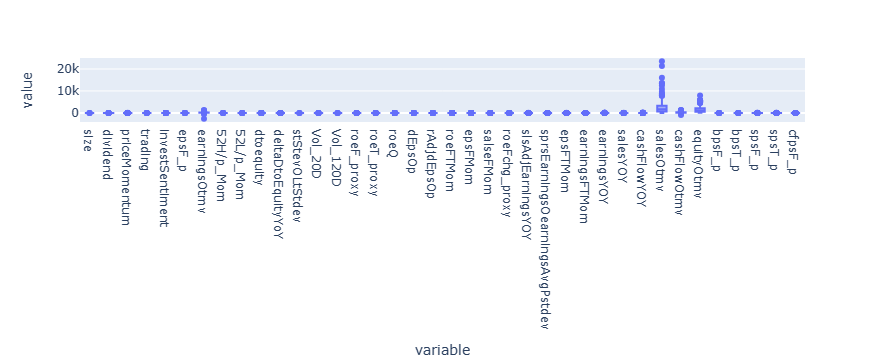

In [725]:
fig = px.box(df, y=factor_ls)
fig.show()

In [726]:
df=df.fillna(df.quantile(.2))

#### 3. winsorization : smoothing under 1% and over 99% 
#### 4. standardization : smoothing under -3 and over +3

In [727]:
pd.concat([eom_data[factor_ls].quantile(.01), eom_data[factor_ls].quantile(.99)], axis=1)

,0.01,0.99
size,13.233338,18.191457
dividend,0.170000,9.780000
priceMomentum,-0.988317,21.016009
trading,0.371254,1.498797
investSentiment,-1.988584,0.787842
epsF_p,-0.110792,0.388456
earningsOtmv,-372.282039,1017.890390
52H/p_Mom,1.000000,1.058822
52L/p_Mom,1.000000,1.058822
dtoequity,0.093052,15.448074


In [728]:
percentile_01=eom_data[factor_ls].quantile(.01)
percentile_99=eom_data[factor_ls].quantile(.99)

In [729]:
eom_data[factor_ls]

size  dividend  priceMomentum   trading  \
Dates      Symbol                                                  
2023-05-31 A005930  19.977696      2.61      -0.019612  0.997489   
           A373220  18.758338      1.18       0.328837  0.671030   
           A000660  18.185731      1.60      -0.198455  1.031252   
           A207940  17.837292      1.18      -0.073829  0.831633   
           A051910  17.760894      1.67       0.279303  0.756275   
...                       ...       ...            ...       ...   
           A020000  13.251553      2.77       0.397931  1.162080   
           A013890  13.254794      1.51       6.091985  1.056322   
           A057050  13.232114      4.82       2.016039  1.003421   
           A284740  13.233350      2.38       3.518926  0.721582   
           A241590  12.981779      0.49       0.268546  1.004494   

                    investSentiment    epsF_p  earningsOtmv  52H/p_Mom  \
Dates      Symbol                                                        
2023-05-31 A005930         0.012480  0.040108     91.422454   1.015406   
           A373220        -0.192480  0.018966      8.659154   1.008347   
           A000660        -0.333618 -0.050946     86.128585   1.021179   
           A207940         0.024966  0.015147     17.627600   1.003827   
           A051910         0.055674  0.057678     57.948183   1.024531   
...                             ...       ...           ...        ...   
           A020000         0.233316  0.222514    295.834034   1.049784   
           A013890        -0.134755  0.052134    114.857222   1.026490   
           A057050        -0.867188  0.213613    198.281294   1.040860   
           A284740         0.682665       NaN    214.687919   1.012048   
           A241590        -0.049949  0.134823    121.542197   1.012552   

                    52L/p_Mom  dtoequity  ...  salesYOY  cashFlowYOY  \
Dates      Symbol                         ...                          
2023-05-31 A005930   1.015406     0.2641  ... -0.094070     0.585547   
           A373220   1.008347     0.8598  ...  0.966112     0.204144   
           A000660   1.021179     0.6412  ... -0.368851    -1.007470   
           A207940   1.003827     0.8456  ...  0.888363     1.443436   
           A051910   1.024531     0.8135  ...  0.194681    -0.465694   
...                       ...        ...  ...       ...          ...   
           A020000   1.049784     0.2605  ...  1.276633     0.366285   
           A013890   1.026490     0.7804  ... -0.567107    -1.000000   
           A057050   1.040860     0.4203  ...  0.205006    -1.487801   
           A284740   1.012048     0.2799  ... -0.580456     0.021455   
           A241590   1.012552     1.4964  ... -0.375990    -1.036576   

                      salesOtmv  cashFlowOtmv   equityOtmv    bpsF_p  \
Dates      Symbol                                                      
2023-05-31 A005930   636.995836    197.776331   747.685550  0.736087   
           A373220   182.630659     18.620414   146.924090  0.158121   
           A000660   564.393770    207.194675   800.527395  0.717757   
           A207940    53.786251     19.826385   161.010886  0.181198   
           A051910  1003.264015    101.389405   725.027420  0.625725   
...                         ...           ...          ...       ...   
           A020000  2710.631077    318.402262  2349.038360  2.656514   
           A013890  2031.544605    125.809331  1096.981899  0.572411   
           A057050  3766.429335    271.813919  3510.285520  3.851588   
           A284740  1679.057563    350.399705  1422.213880  0.572411   
           A241590  3807.399626    145.759303  1360.839928  1.299028   

                      bpsT_p     spsF_p     spsT_p   cfpsF_p  
Dates      Symbol                                             
2023-05-31 A005930  0.713499  39.472428  40.324200  8.256211  
           A373220  0.139783   0.684966   0.504630  0.093780  
           A000660  0.765190   2.763347   3.332770 

In [730]:
df = df.where(df > percentile_01, other=percentile_01, axis=1)

In [731]:
df = df.where(df < percentile_99, other=percentile_99, axis=1)

In [732]:
df

size  dividend  priceMomentum   trading  \
Dates      Symbol                                                  
2023-05-31 A005930  18.191457      2.61      -0.019612  0.997489   
           A373220  18.191457      1.18       0.328837  0.671030   
           A000660  18.185731      1.60      -0.198455  1.031252   
           A207940  17.837292      1.18      -0.073829  0.831633   
           A051910  17.760894      1.67       0.279303  0.756275   
...                       ...       ...            ...       ...   
           A020000  13.251553      2.77       0.397931  1.162080   
           A013890  13.254794      1.51       6.091985  1.056322   
           A057050  13.233338      4.82       2.016039  1.003421   
           A284740  13.233350      2.38       3.518926  0.721582   
           A241590  13.233338      0.49       0.268546  1.004494   

                    investSentiment    epsF_p  earningsOtmv  52H/p_Mom  \
Dates      Symbol                                                        
2023-05-31 A005930         0.012480  0.040108     91.422454   1.015406   
           A373220        -0.192480  0.018966      8.659154   1.008347   
           A000660        -0.333618 -0.050946     86.128585   1.021179   
           A207940         0.024966  0.015147     17.627600   1.003827   
           A051910         0.055674  0.057678     57.948183   1.024531   
...                             ...       ...           ...        ...   
           A020000         0.233316  0.222514    295.834034   1.049784   
           A013890        -0.134755  0.052134    114.857222   1.026490   
           A057050        -0.867188  0.213613    198.281294   1.040860   
           A284740         0.682665  0.039736    214.687919   1.012048   
           A241590        -0.049949  0.134823    121.542197   1.012552   

                    52L/p_Mom  dtoequity  ...  salesYOY  cashFlowYOY  \
Dates      Symbol                         ...                          
2023-05-31 A005930   1.015406     0.2641  ... -0.094070     0.585547   
           A373220   1.008347     0.8598  ...  0.966112     0.204144   
           A000660   1.021179     0.6412  ... -0.368851    -1.007470   
           A207940   1.003827     0.8456  ...  0.888363     1.443436   
           A051910   1.024531     0.8135  ...  0.194681    -0.465694   
...                       ...        ...  ...       ...          ...   
           A020000   1.049784     0.2605  ...  1.276633     0.366285   
           A013890   1.026490     0.7804  ... -0.567107    -1.000000   
           A057050   1.040860     0.4203  ...  0.205006    -1.487801   
           A284740   1.012048     0.2799  ... -0.580456     0.021455   
           A241590   1.012552     1.4964  ... -0.375990    -1.036576   

                      salesOtmv  cashFlowOtmv   equityOtmv    bpsF_p  \
Dates      Symbol                                                      
2023-05-31 A005930   636.995836    197.776331   747.685550  0.736087   
           A373220   182.630659     18.620414   146.924090  0.158121   
           A000660   564.393770    207.194675   800.527395  0.717757   
           A207940    53.786251     19.826385   161.010886  0.181198   
           A051910  1003.264015    101.389405   725.027420  0.625725   
...                         ...           ...          ...       ...   
           A020000  2710.631077    318.402262  2349.038360  2.656514   
           A013890  2031.544605    125.809331  1096.981899  0.572411   
           A057050  3766.429335    271.813919  3510.285520  3.851588   
           A284740  1679.057563    350.399705  1422.213880  0.572411   
           A241590  3807.399626    145.759303  1360.839928  1.299028   

                      bpsT_p     spsF_p     spsT_p   cfpsF_p  
Dates      Symbol                                             
2023-05-31 A005930  0.713499  25.084683  24.768735  2.882053  
           A373220  0.139783   0.684966   0.504630  0.093780  
           A000660  0.765190   2.763347   3.332770 

In [733]:
from scipy import stats

In [734]:
df_zscore=stats.zscore(df, axis=0)

In [735]:
df_zscore[df_zscore>3]=3
df_zscore[df_zscore<-3]=-3

In [736]:
df_zscore

size  dividend  priceMomentum   trading  \
Dates      Symbol                                                 
2023-05-31 A005930  2.842271 -0.069845      -0.289585  0.456445   
           A373220  2.842271 -0.700192      -0.191910 -0.943956   
           A000660  2.837189 -0.515055      -0.339717  0.601275   
           A207940  2.527951 -0.700192      -0.304783 -0.255023   
           A051910  2.460148 -0.484199      -0.205795 -0.578287   
...                      ...       ...            ...       ...   
           A020000 -1.541867  0.000683      -0.172542  1.162483   
           A013890 -1.538991 -0.554727       1.423582  0.708816   
           A057050 -1.558034  0.904328       0.281037  0.481892   
           A284740 -1.558023 -0.171230       0.702317 -0.727107   
           A241590 -1.558034 -1.004346      -0.208810  0.486490   

                    investSentiment    epsF_p  earningsOtmv  52H/p_Mom  \
Dates      Symbol                                                        
2023-05-31 A005930         0.291477 -0.744313     -0.351171  -0.231985   
           A373220        -0.106696 -0.970130     -0.728235  -0.911057   
           A000660        -0.380886 -1.716849     -0.375290   0.323331   
           A207940         0.315736 -1.010924     -0.687375  -1.345953   
           A051910         0.375392 -0.556650     -0.503678   0.645833   
...                             ...       ...           ...        ...   
           A020000         0.720497  1.203927      0.580113   3.000000   
           A013890         0.005446 -0.615865     -0.244404   0.834294   
           A057050        -1.417453  1.108855      0.135670   2.216711   
           A284740         1.593446 -0.748290      0.210417  -0.555024   
           A241590         0.170198  0.267315     -0.213948  -0.506528   

                    52L/p_Mom  dtoequity  ...  salesYOY  cashFlowYOY  \
Dates      Symbol                         ...                          
2023-05-31 A005930  -0.231985  -0.581312  ... -0.396076    -0.083011   
           A373220  -0.911057  -0.414322  ... -0.133831    -0.132485   
           A000660   0.323331  -0.475601  ... -0.464045    -0.289648   
           A207940  -1.345953  -0.418302  ... -0.153063     0.028269   
           A051910   0.645833  -0.427301  ... -0.324651    -0.219372   
...                       ...        ...  ...       ...          ...   
           A020000   3.000000  -0.582321  ... -0.057021    -0.111453   
           A013890   0.834294  -0.436580  ... -0.513085    -0.288680   
           A057050   2.216711  -0.537525  ... -0.322097    -0.351954   
           A284740  -0.555024  -0.576883  ... -0.516387    -0.156182   
           A241590  -0.506528  -0.235866  ... -0.465811    -0.293424   

                    salesOtmv  cashFlowOtmv  equityOtmv    bpsF_p    bpsT_p  \
Dates      Symbol                                                             
2023-05-31 A005930  -0.658670     -0.084339   -0.614829 -0.588024 -0.546592   
           A373220  -0.811257     -0.819376   -1.046677 -1.111253 -1.092612   
           A000660  -0.683052     -0.045697   -0.576844 -0.604619 -0.497396   
           A207940  -0.854527     -0.814428   -1.036551 -1.090362 -1.067108   
           A051910  -0.535668     -0.479793   -0.631116 -0.687935 -0.665600   
...                       ...           ...         ...       ...       ...   
           A020000   0.037710      0.410563    0.536279  1.150526  1.104318   
           A013890  -0.190345     -0.379603   -0.363742 -0.736199 -0.724152   
           A057050   0.392274      0.219421    1.371023  2.232418  2.236444   
           A284740  -0.308719      0.541841   -0.129954 -0.736199 -0.724152   
           A241590   0.406033     -0.297753   -0.174072 -0.078398 -0.048875   

                      spsF_p    spsT_p   cfpsF_p  
Dates      Symbol                                 
2023-05-31 A005930  3.000000  3.000000  3.000000  
           A373220 -0.458448 -0.484946 -0.297391  
           A000660 -

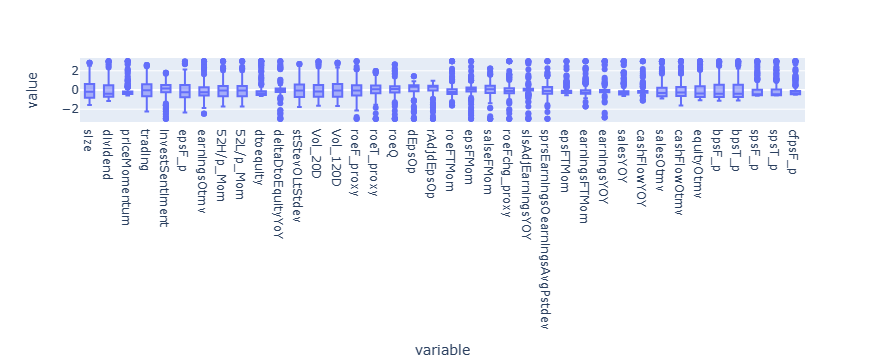

In [737]:
fig = px.box(df_zscore, y=factor_ls)
fig.show()

In [738]:
df_zscore

size  dividend  priceMomentum   trading  \
Dates      Symbol                                                 
2023-05-31 A005930  2.842271 -0.069845      -0.289585  0.456445   
           A373220  2.842271 -0.700192      -0.191910 -0.943956   
           A000660  2.837189 -0.515055      -0.339717  0.601275   
           A207940  2.527951 -0.700192      -0.304783 -0.255023   
           A051910  2.460148 -0.484199      -0.205795 -0.578287   
...                      ...       ...            ...       ...   
           A020000 -1.541867  0.000683      -0.172542  1.162483   
           A013890 -1.538991 -0.554727       1.423582  0.708816   
           A057050 -1.558034  0.904328       0.281037  0.481892   
           A284740 -1.558023 -0.171230       0.702317 -0.727107   
           A241590 -1.558034 -1.004346      -0.208810  0.486490   

                    investSentiment    epsF_p  earningsOtmv  52H/p_Mom  \
Dates      Symbol                                                        
2023-05-31 A005930         0.291477 -0.744313     -0.351171  -0.231985   
           A373220        -0.106696 -0.970130     -0.728235  -0.911057   
           A000660        -0.380886 -1.716849     -0.375290   0.323331   
           A207940         0.315736 -1.010924     -0.687375  -1.345953   
           A051910         0.375392 -0.556650     -0.503678   0.645833   
...                             ...       ...           ...        ...   
           A020000         0.720497  1.203927      0.580113   3.000000   
           A013890         0.005446 -0.615865     -0.244404   0.834294   
           A057050        -1.417453  1.108855      0.135670   2.216711   
           A284740         1.593446 -0.748290      0.210417  -0.555024   
           A241590         0.170198  0.267315     -0.213948  -0.506528   

                    52L/p_Mom  dtoequity  ...  salesYOY  cashFlowYOY  \
Dates      Symbol                         ...                          
2023-05-31 A005930  -0.231985  -0.581312  ... -0.396076    -0.083011   
           A373220  -0.911057  -0.414322  ... -0.133831    -0.132485   
           A000660   0.323331  -0.475601  ... -0.464045    -0.289648   
           A207940  -1.345953  -0.418302  ... -0.153063     0.028269   
           A051910   0.645833  -0.427301  ... -0.324651    -0.219372   
...                       ...        ...  ...       ...          ...   
           A020000   3.000000  -0.582321  ... -0.057021    -0.111453   
           A013890   0.834294  -0.436580  ... -0.513085    -0.288680   
           A057050   2.216711  -0.537525  ... -0.322097    -0.351954   
           A284740  -0.555024  -0.576883  ... -0.516387    -0.156182   
           A241590  -0.506528  -0.235866  ... -0.465811    -0.293424   

                    salesOtmv  cashFlowOtmv  equityOtmv    bpsF_p    bpsT_p  \
Dates      Symbol                                                             
2023-05-31 A005930  -0.658670     -0.084339   -0.614829 -0.588024 -0.546592   
           A373220  -0.811257     -0.819376   -1.046677 -1.111253 -1.092612   
           A000660  -0.683052     -0.045697   -0.576844 -0.604619 -0.497396   
           A207940  -0.854527     -0.814428   -1.036551 -1.090362 -1.067108   
           A051910  -0.535668     -0.479793   -0.631116 -0.687935 -0.665600   
...                       ...           ...         ...       ...       ...   
           A020000   0.037710      0.410563    0.536279  1.150526  1.104318   
           A013890  -0.190345     -0.379603   -0.363742 -0.736199 -0.724152   
           A057050   0.392274      0.219421    1.371023  2.232418  2.236444   
           A284740  -0.308719      0.541841   -0.129954 -0.736199 -0.724152   
           A241590   0.406033     -0.297753   -0.174072 -0.078398 -0.048875   

                      spsF_p    spsT_p   cfpsF_p  
Dates      Symbol                                 
2023-05-31 A005930  3.000000  3.000000  3.000000  
           A373220 -0.458448 -0.484946 -0.297391  
           A000660 -

In [740]:
df_zscore['adjMomentum']=df_zscore[['dEpsOp', 'rAdjdEpsOp']].mean(1)
df_zscore['earningYield']=df_zscore[['epsF_p', 'earningsOtmv']].mean(1)
df_zscore['growth']=df_zscore[['epsFTMom', 'earningsFTMom', 'earningsYOY', 'salesYOY', 'cashFlowYOY']].mean(1)
df_zscore['momentum']=df_zscore[['roeFTMom', 'epsFMom', 'salseFMom', 'roeFchg_proxy', 'slsAdjEarningsYOY', 'sprsEarningsOearningsAvgPstdev']].mean(1)
df_zscore['priceReversal']=df_zscore[['52H/p_Mom', '52L/p_Mom']].mean(1)
df_zscore['priceStdev']=df_zscore[['stStevOLtStdev', 'Vol_20D', 'Vol_120D']].mean(1)
df_zscore['quality']=df_zscore[['roeF_proxy', 'roeT_proxy', 'roeQ']].mean(1)
df_zscore['stability']=df_zscore[['dtoequity', 'deltaDtoEquityYoY']].mean(1)
df_zscore['value']=df_zscore[['salesOtmv', 'cashFlowOtmv', 'equityOtmv', 'bpsF_p', 'bpsT_p', 'spsF_p', 'spsT_p', 'cfpsF_p']].mean(1)

In [ ]:
train_col = ['size', 'value', 'earningYield', 'quality', 'stability', 'dividend',
       'growth', 'momentum', 'adjMomentum', 'priceMomentum', 'priceReversal',
       'priceStdev', 'trading', 'investSentiment', 
       'senti_forg20', 'senti_forg60', 'senti_forg120', 'trA_20avg_spot', 'trA_60avg_spot']

# redundant
# 'cashFlowOtmv', 'cashFlowYOY', 'earningsOtmv', 'earningsYOY', 'salesOtmv', 'salesYOY',

### compute correlation between factors and index every quarter

### find return for each factor basket

In [ ]:
# remove duplicated rows in a table
# WITH ranked_rows AS (
#     SELECT
#         id,
#         column1,
#         column2,
#         created_at,
#         ROW_NUMBER() OVER (PARTITION BY column1, column2 ORDER BY created_at DESC) AS row_num
#     FROM
#         your_table
# )
# DELETE FROM ranked_rows
# WHERE row_num > 1;

In [ ]:
def data_preprocessing():
    
    return


def compute_factors(raw_data):
        
    return 


def create_portfolio(factors, prices):
    
    return


def performance_analysis():
    
    return

In [759]:
import quantstats as qs

In [ ]:
for rebal_date in rebal_dates:
    
    